# CONVOLUTIONAL NEURAL NETWORK

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline

## PREPARE DATA

### MNIST DATASET

http://yann.lecun.com/exdb/mnist/

In [ ]:
# Download MNIST dataset
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

In [3]:
# Number of train images
mnist.train.num_examples

55000

In [4]:
# Number of test images
mnist.test.num_examples

10000

In [5]:
# Number of test validation
mnist.validation.num_examples

5000

In [6]:
# Shape of train dataset
mnist.train.images.shape

(55000, 784)

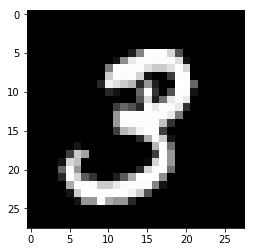

In [7]:
# Plot single image from train dataset
single_image = mnist.train.images[1].reshape(28,28)
plt.imshow(single_image, cmap='gist_gray')

## CREATE MODEL

In [8]:
# Placeholders
x = tf.placeholder(tf.float32, shape=[None,784])
y_true = tf.placeholder(tf.float32, shape=[None,10])

# Dropout
hold_prob = tf.placeholder(tf.float32)

In [9]:
# Init weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [10]:
# Init biases
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [11]:
# Convolution
def conv2d(x, W):
    # x --> [batch. H, W, Channels]
    # W --> [filter H, filter W, Channels IN, Channels OUT]
    
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [12]:
# Max-pooling
def max_pool_2by2(x):
    # x --> [batch. H, W, Channels]
    
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [13]:
# Function to create convolutional layer
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

In [14]:
# Function to create fully connected layer
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer,W) + b

In [15]:
# Reshape input images
x_image = tf.reshape(x,[-1,28,28,1])

In [16]:
# First convolution and pooling layer
convo_1 = convolutional_layer(x_image,shape=[5,5,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [17]:
# Second convolution and pooling layer
convo_2 = convolutional_layer(convo_1_pooling, shape=[5,5,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [18]:
# Fully connected layer
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

In [19]:
# Add dropout
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

In [20]:
# Output layer
y_pred = normal_full_layer(full_one_dropout, 10)

In [21]:
# Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits=y_pred))

In [22]:
# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
# Minimize error
train = optimizer.minimize(cross_entropy)

In [ ]:
# Number of epochs
epochs = 5000

# Batch size
batch_size = 50

# Initializer
init = tf.global_variables_initializer()

# Create session
with tf.Session() as sess:
    
    # Run initializer
    sess.run(init)
    
    # Loop for training
    for i in range(epochs):
        
        # Grab next batch from train images
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run training
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y, hold_prob:0.5})
        
        # Display accuracy every 100 steps 
        if i%100 == 0:
            
            print("ON STEP: {}".format(i))
            print("ACCURACY: ")
            
            # Matching results
            matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true,1))
            # Accuracy
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))
            
            # Print accuracy for test images
            print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels,hold_prob:1}))
            print('\n')